In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


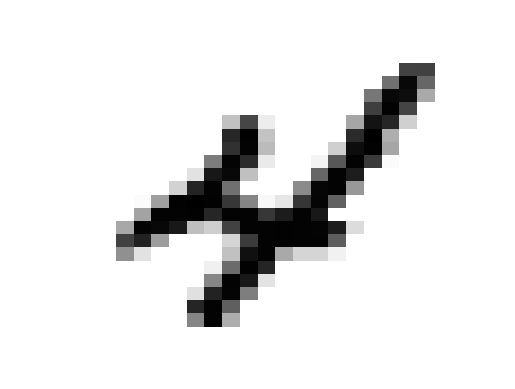

In [7]:
plt.pcolor( 1-x_train[9,::-1,:] , cmap = 'gray' );
plt.axis('off');

In [8]:
y_train[9]

4

In [9]:
x_train = x_train.reshape((ndata_train,28,28,1)) #last shape value is number of colors (bw vs RGB)
x_test = x_test.reshape((ndata_test,28,28,1))


xshape = x_train.shape[1:4]
xshape


(28, 28, 1)

In [10]:
NNmodel = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=xshape), #turn a grid into a bunch of neurons
        tf.keras.layers.Dense(64,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)), #l1 = lasso
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(64,activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])
# not necessarily a great neural network, just showing the many options

In [11]:
NNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
NNmodel.fit(x_train,y_train,epochs=12,validation_split=0.2,batch_size=200)


Epoch 1/12


240/240 [==============================] - 6s 9ms/step - loss: 1.1279 - accuracy: 0.7840 - val_loss: 0.5608 - val_accuracy: 0.9087
Epoch 2/12
240/240 [==============================] - 2s 7ms/step - loss: 0.5269 - accuracy: 0.9047 - val_loss: 0.4226 - val_accuracy: 0.9296
Epoch 3/12
240/240 [==============================] - 2s 7ms/step - loss: 0.4266 - accuracy: 0.9215 - val_loss: 0.3611 - val_accuracy: 0.9376
Epoch 4/12
240/240 [==============================] - 2s 7ms/step - loss: 0.3689 - accuracy: 0.9338 - val_loss: 0.3195 - val_accuracy: 0.9468
Epoch 5/12
240/240 [==============================] - 2s 6ms/step - loss: 0.3285 - accuracy: 0.9420 - val_loss: 0.2877 - val_accuracy: 0.9544
Epoch 6/12
240/240 [==============================] - 2s 6ms/step - loss: 0.3010 - accuracy: 0.9475 - val_loss: 0.2622 - val_accuracy: 0.9614
Epoch 7/12
240/240 [==============================] - 2s 6ms/step - loss: 0.2803 - accuracy: 0.9524 - val_loss: 0.2514 - val_accuracy: 0.9613
Epoc

In [13]:
print('This model predicts '+str(NNmodel.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 2s 5ms/step - loss: 0.2108 - accuracy: 0.9656
This model predicts 96.56000137329102% of the test data correctly


In [ ]:
pred_probs = NNmodel.predict(x_test)
pred_probs.shape

In [ ]:
np.sum(pred_probs[0,:])

In [ ]:
pred_class = np.argmax(pred_probs, axis=1)
np.mean(pred_class==y_test)

In [14]:
NNmodel2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2), #stride is how many pixels you skip
        tf.keras.layers.Flatten(), #IMPERATIVE to flatten after convoluting and max pooling
        tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax) #last layer has softmax so we get probabilities
        ])

In [15]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 1440)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               184448    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [16]:
NNmodel2.fit(x_train,y_train,epochs=5,validation_split=0.2,batch_size=500)

Epoch 1/5
96/96 [==============================] - 7s 45ms/step - loss: 1.6137 - accuracy: 0.8133 - val_loss: 0.9297 - val_accuracy: 0.9281
Epoch 2/5
96/96 [==============================] - 4s 37ms/step - loss: 0.8091 - accuracy: 0.9286 - val_loss: 0.6789 - val_accuracy: 0.9456
Epoch 3/5
96/96 [==============================] - 3s 34ms/step - loss: 0.6308 - accuracy: 0.9475 - val_loss: 0.5648 - val_accuracy: 0.9585
Epoch 4/5
96/96 [==============================] - 3s 34ms/step - loss: 0.5383 - accuracy: 0.9564 - val_loss: 0.4931 - val_accuracy: 0.9661
Epoch 5/5
96/96 [==============================] - 3s 35ms/step - loss: 0.4819 - accuracy: 0.9601 - val_loss: 0.4635 - val_accuracy: 0.9646


In [17]:
NNmodel2.predict(x_test)

313/313 [==============================] - 2s 5ms/step


array([[1.3000311e-04, 2.7024912e-06, 4.2862017e-03, ..., 9.8329180e-01,
        1.7900048e-04, 1.0210375e-03],
       [5.4704380e-04, 3.9327418e-04, 9.9809343e-01, ..., 1.9853925e-08,
        1.3572967e-04, 3.7690193e-09],
       [1.6229493e-03, 9.7137207e-01, 3.0513471e-03, ..., 4.1863760e-03,
        1.0501674e-02, 1.0027468e-03],
       ...,
       [1.8308366e-06, 3.6652068e-08, 2.5025321e-07, ..., 2.0614700e-05,
        1.1446828e-03, 9.0668565e-03],
       [1.3584008e-05, 5.9547037e-06, 6.4282990e-06, ..., 6.0494784e-07,
        2.7028443e-02, 1.3014147e-05],
       [7.9603305e-05, 1.4833226e-08, 2.1790773e-04, ..., 1.3834892e-09,
        5.9508125e-06, 1.6235276e-08]], dtype=float32)

In [18]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 2s 6ms/step
0.964
